In [37]:
# ========== basics ==========
import re
import json
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
warnings.filterwarnings("ignore")

# ==========   saving ==========
import joblib
import pickle
from datasets import load_dataset
import ast

# ========== Scikit-learn:   ==========
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score, roc_curve, auc, ConfusionMatrixDisplay
)

# ========== Scikit-learn:   ==========
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# ========== Scikit-learn:   ==========
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, HuberRegressor, LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
)
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors

# ========== Scikit-learn: ==========
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2

In [38]:
from google.colab import drive               # the library that connects notebook with the drive to read the dataset
drive.mount('/content/drive')                # connection with my drive
file_path = '/content/drive/My Drive/datasets/dataset.csv' # dataset path
df = pd.read_csv(file_path)   # read the dataset and convert it from CSV to dataframe
pd.set_option('display.max_columns',len(df.columns)) # adjusting style
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,owners,year,price,region,mileage,mark,model,complectation,steering_wheel,gear_type,engine,transmission,power,displacement,characteristics,color,body_type_type,body_type_name,super_gen_name,super_gen_year_from,super_gen_year_to
0,1,2021,1460000,Приморский край,56000,Nissan,Note,NaN,RIGHT,ALL_WHEEL_DRIVE,HYBRID,AUTOMATIC,82,1198.0,Autech Crossover 1.2hyb AT (82 л.с.) 4WD,040001,ALLROAD_5_DOORS,Внедорожник 5 дв. Autech Crossover,III,2020,2023.0
1,1,2011,1460000,Орловская область,119000,Skoda,Yeti,Elegance,LEFT,ALL_WHEEL_DRIVE,GASOLINE,ROBOT,152,1798.0,1.8 AMT (152 л.с.) 4WD,97948F,ALLROAD_5_DOORS,Внедорожник 5 дв.,I,2009,2014.0
2,2,2019,1460000,Калужская область,73100,Kia,Rio,NaN,LEFT,FORWARD_CONTROL,GASOLINE,AUTOMATIC,123,1591.0,1.6 AT (123 л.с.),200204,SEDAN,Седан,IV,2017,2020.0
3,2,2018,1459000,Москва и Московская область,103500,Volkswagen,Polo,Drive,LEFT,FORWARD_CONTROL,GASOLINE,ROBOT,125,1395.0,1.4 AMT (125 л.с.),660099,SEDAN,Седан,V Рестайлинг,2014,2020.0
4,1,2022,1457000,Белгородская область,33641,CHERY,Tiggo 4 Pro,Action,LEFT,FORWARD_CONTROL,GASOLINE,MECHANICAL,113,1499.0,1.5 MT (113 л.с.),FAFBFB,ALLROAD_5_DOORS,Внедорожник 5 дв.,I,2020,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432222,4,2004,287000,Республика Башкортостан,289567,Renault,Megane,NaN,LEFT,FORWARD_CONTROL,GASOLINE,MECHANICAL,115,1598.0,1.6 MT (115 л.с.),CACECB,SEDAN,Седан,II,2002,2006.0
432223,3,1994,289777,Краснодарский край,236987,Volkswagen,Passat,NaN,LEFT,FORWARD_CONTROL,GASOLINE,MECHANICAL,90,1781.0,1.8 MT (90 л.с.),040001,WAGON_5_DOORS,Универсал 5 дв.,B4,1993,1997.0
432224,2,2010,290000,Москва и Московская область,103630,ЗАЗ,Chance,S,LEFT,FORWARD_CONTROL,GASOLINE,MECHANICAL,70,1299.0,1.3 MT (70 л.с.),EE1D19,HATCHBACK_5_DOORS,Хэтчбек 5 дв.,NaN,2009,2014.0
432225,3,2005,290000,Москва и Московская область,216856,Renault,Logan,NaN,LEFT,FORWARD_CONTROL,GASOLINE,MECHANICAL,75,1390.0,1.4 MT (75 л.с.),0000CC,SEDAN,Седан,I,2004,2009.0


In [39]:
df.info() # get the schema, data type and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432227 entries, 0 to 432226
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   owners               432227 non-null  int64  
 1   year                 432227 non-null  int64  
 2   price                432227 non-null  int64  
 3   region               432227 non-null  object 
 4   mileage              432227 non-null  int64  
 5   mark                 432227 non-null  object 
 6   model                432227 non-null  object 
 7   complectation        171896 non-null  object 
 8   steering_wheel       432227 non-null  object 
 9   gear_type            432227 non-null  object 
 10  engine               432227 non-null  object 
 11  transmission         432227 non-null  object 
 12  power                432227 non-null  int64  
 13  displacement         429470 non-null  float64
 14  characteristics      432227 non-null  object 
 15  color            

In [40]:
df.describe(include="all") # analyze the data

,owners,year,price,region,mileage,mark,model,complectation,steering_wheel,gear_type,engine,transmission,power,displacement,characteristics,color,body_type_type,body_type_name,super_gen_name,super_gen_year_from,super_gen_year_to
count,432227.000000,432227.000000,4.322270e+05,432227,432227.000000,432227,432227,171896,432227,432227,432227,432227,432227.000000,429470.000000,432227,432227,432227,432227,388112,432227.000000,421987.00000
unique,NaN,NaN,NaN,87,NaN,224,2356,4107,2,3,5,4,NaN,NaN,9116,16,27,329,1236,NaN,NaN
top,NaN,NaN,NaN,Москва и Московская область,NaN,Lada (ВАЗ),Granta,Comfort,LEFT,FORWARD_CONTROL,GASOLINE,AUTOMATIC,NaN,NaN,1.6 MT (106 л.с.),FAFBFB,SEDAN,Седан,I,NaN,NaN
freq,NaN,NaN,NaN,86985,NaN,61363,9726,10646,396435,264305,370530,189325,NaN,NaN,7444,102069,153449,149366,86261,NaN,NaN
mean,2.460154,2012.028888,1.619113e+06,NaN,162046.826977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.058955,1974.645063,NaN,NaN,NaN,NaN,NaN,2009.057319,2014.77164
std,1.188675,7.848552,1.598853e+06,NaN,102724.051894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.056963,736.230456,NaN,NaN,NaN,NaN,NaN,9.308468,7.09112
min,1.000000,1923.000000,2.000000e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,217.000000,NaN,NaN,NaN,NaN,NaN,1923.000000,1927.00000
25%,1.000000,2008.000000,5.650000e+05,NaN,85000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1591.000000,NaN,NaN,NaN,NaN,NaN,2005.000000,2011.00000
50%,2.000000,2013.000000,1.118800e+06,NaN,154123.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.000000,1690.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,2015.00000
75%,4.000000,2018.000000,2.080000e+06,NaN,223000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,1999.000000,NaN,NaN,NaN,NaN,NaN,2016.000000,2020.00000


In [41]:
df.isna().sum().to_frame() # compute the Null value

,0
owners,0
year,0
price,0
region,0
mileage,0
mark,0
model,0
complectation,260331
steering_wheel,0
gear_type,0


In [42]:
df.drop(['complectation'], axis=1, inplace=True) # drop the unuseful columns

In [43]:
df.drop(['super_gen_name'], axis=1, inplace=True) # drop the unuseful columns

In [44]:
df.dropna(inplace=True)

In [45]:
print(df.duplicated().sum()) # compute the duplicated value

35


In [46]:
df.drop_duplicates(inplace=True) # drop the duplicated value

In [47]:
df.head(5) # show the first 5 rows

,owners,year,price,region,mileage,mark,model,steering_wheel,gear_type,engine,transmission,power,displacement,characteristics,color,body_type_type,body_type_name,super_gen_year_from,super_gen_year_to
0,1,2021,1460000,Приморский край,56000,Nissan,Note,RIGHT,ALL_WHEEL_DRIVE,HYBRID,AUTOMATIC,82,1198.0,Autech Crossover 1.2hyb AT (82 л.с.) 4WD,040001,ALLROAD_5_DOORS,Внедорожник 5 дв. Autech Crossover,2020,2023.0
1,1,2011,1460000,Орловская область,119000,Skoda,Yeti,LEFT,ALL_WHEEL_DRIVE,GASOLINE,ROBOT,152,1798.0,1.8 AMT (152 л.с.) 4WD,97948F,ALLROAD_5_DOORS,Внедорожник 5 дв.,2009,2014.0
2,2,2019,1460000,Калужская область,73100,Kia,Rio,LEFT,FORWARD_CONTROL,GASOLINE,AUTOMATIC,123,1591.0,1.6 AT (123 л.с.),200204,SEDAN,Седан,2017,2020.0
3,2,2018,1459000,Москва и Московская область,103500,Volkswagen,Polo,LEFT,FORWARD_CONTROL,GASOLINE,ROBOT,125,1395.0,1.4 AMT (125 л.с.),660099,SEDAN,Седан,2014,2020.0
4,1,2022,1457000,Белгородская область,33641,CHERY,Tiggo 4 Pro,LEFT,FORWARD_CONTROL,GASOLINE,MECHANICAL,113,1499.0,1.5 MT (113 л.с.),FAFBFB,ALLROAD_5_DOORS,Внедорожник 5 дв.,2020,2024.0


In [48]:
columns = df.columns
columns

Index(['owners', 'year', 'price', 'region', 'mileage', 'mark', 'model',
       'steering_wheel', 'gear_type', 'engine', 'transmission', 'power',
       'displacement', 'characteristics', 'color', 'body_type_type',
       'body_type_name', 'super_gen_year_from', 'super_gen_year_to'],
      dtype='object')

In [49]:
continuous_col = df.select_dtypes(include=['float64', 'int64']).columns
continuous_col = [col for col in continuous_col if col != 'price']
categorical_col = df.select_dtypes(include=['object', 'category']).columns  #classifiy the categorical columns

print(categorical_col)
print(continuous_col)

Index(['region', 'mark', 'model', 'steering_wheel', 'gear_type', 'engine',
       'transmission', 'characteristics', 'color', 'body_type_type',
       'body_type_name'],
      dtype='object')
['owners', 'year', 'mileage', 'power', 'displacement', 'super_gen_year_from', 'super_gen_year_to']


In [50]:
for i in categorical_col:
    print(df.value_counts(i))

region
Москва и Московская область                84225
Санкт-Петербург и Ленинградская область    24436
Краснодарский край                         21950
Приморский край                            20496
Свердловская область                       16903
                                           ...  
Витебская область                              8
Чукотский автономный округ                     6
Западно-Казахстанская область                  2
Гомельская область                             1
Брестская область                              1
Name: count, Length: 87, dtype: int64
mark
Lada (ВАЗ)    61356
Toyota        38459
Kia           28837
Hyundai       26391
Volkswagen    23058
              ...  
Tofas             1
Tianma            1
Yema              1
ЗИЛ               1
Канонир           1
Name: count, Length: 179, dtype: int64
model
Granta              9726
Focus               8599
Rio                 7586
Solaris             7289
Priora              7178
                    .

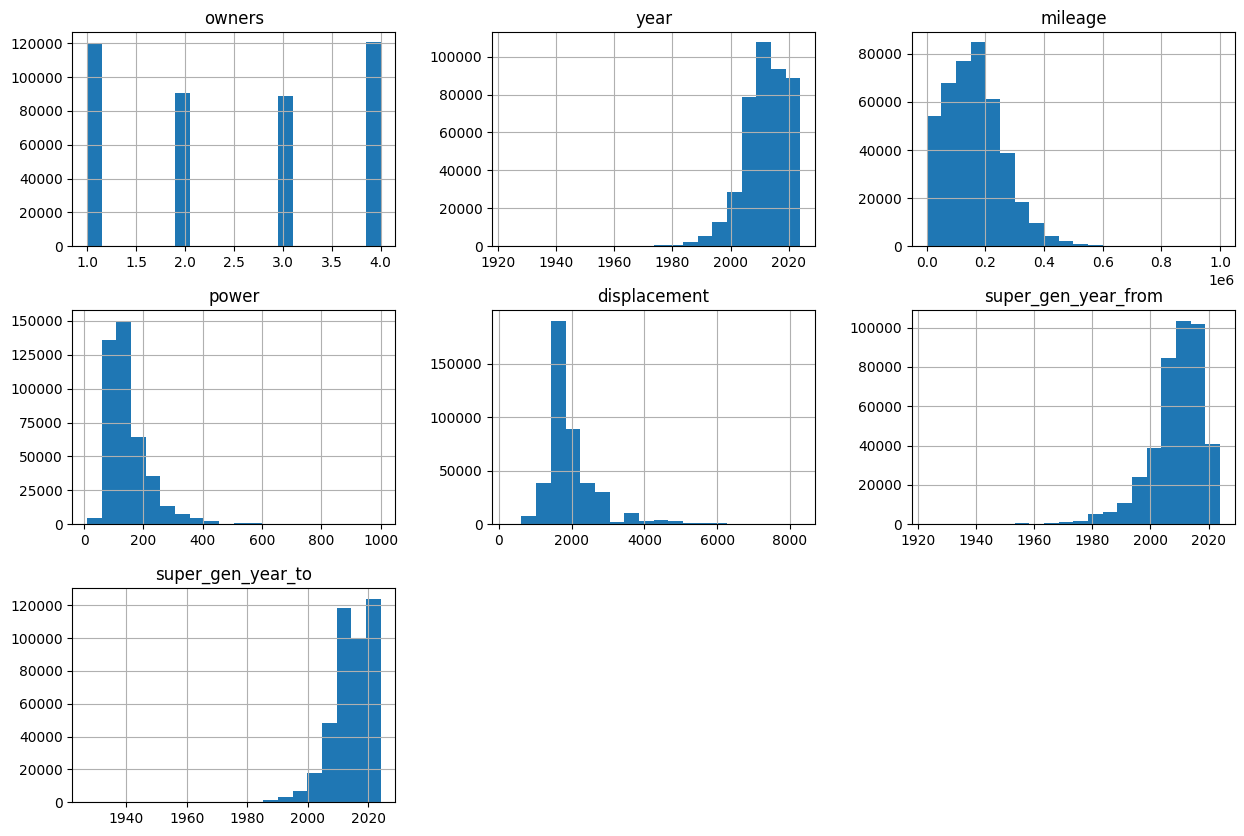

In [51]:
dist = df[continuous_col] #represent the numerical data distrubutions
dist.hist(figsize=(15, 10), bins=20) #visualize histogram using matplotlib
plt.show()

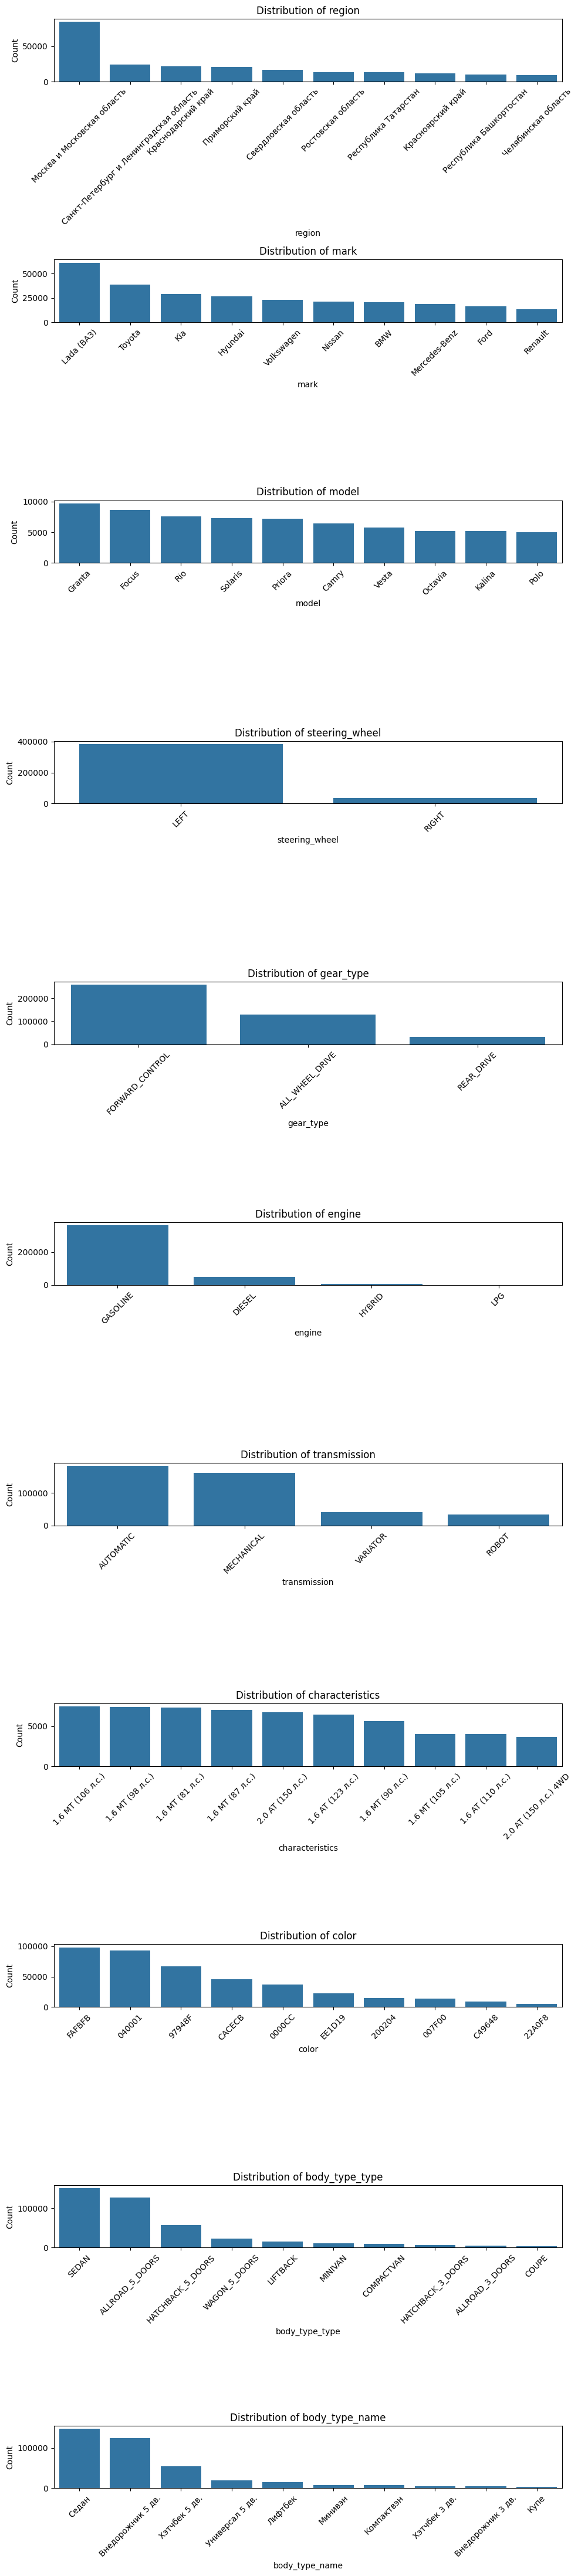

In [52]:
fig, axes = plt.subplots(len(categorical_col), 1, figsize=(10, 4 * len(categorical_col)))
for i, col in enumerate(categorical_col):
    ax = axes[i]
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

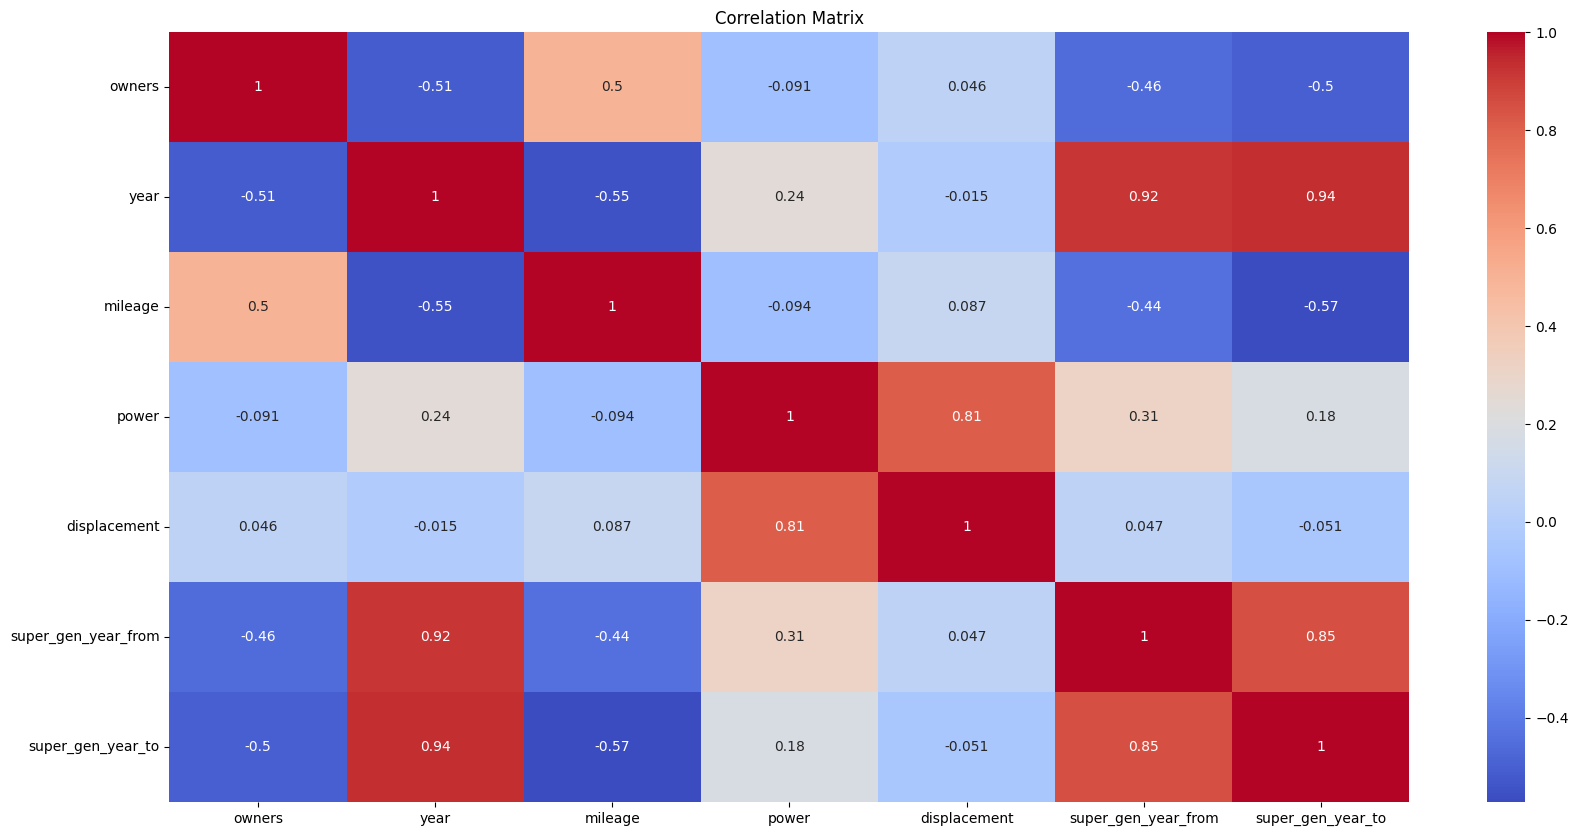

In [53]:
corr_matrix = df[continuous_col].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [54]:
df[continuous_col].skew()

,0
owners,0.003006
year,-1.381719
mileage,0.897651
power,1.912016
displacement,2.264154
super_gen_year_from,-1.508570
super_gen_year_to,-1.407869


In [55]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for col in continuous_col:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in owners: 0
Number of outliers in year: 8532
Number of outliers in mileage: 6006
Number of outliers in power: 20429
Number of outliers in displacement: 60736
Number of outliers in super_gen_year_from: 14722
Number of outliers in super_gen_year_to: 8870


In [56]:
from scipy.stats.mstats import winsorize
import pandas as pd

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def apply_winsorization(data, continuous_cols, lower_pct=0.01, upper_pct=0.01, apply=True):
    df_copy = data.copy()
    summary = {}

    for col in continuous_cols:
        outliers, low, high = detect_outliers_iqr(df_copy, col)
        n_out_before = len(outliers)

        if not apply:
            summary[col] = {
                "outliers_before": n_out_before,
                "outliers_after": n_out_before,
                "winsorized": False
            }
            continue

        df_copy[col] = winsorize(df_copy[col], limits=[lower_pct, upper_pct])
        outliers_after, _, _ = detect_outliers_iqr(df_copy, col)
        n_out_after = len(outliers_after)

        summary[col] = {
            "outliers_before": n_out_before,
            "outliers_after": n_out_after,
            "winsorized": True
        }

    return df_copy, summary

clean_df, outlier_report = apply_winsorization(
    df,
    continuous_col,
    lower_pct=0.01,
    upper_pct=0.01,
    apply=True
)

print("\nOutlier Report (Before vs After Winsorization):\n")
for col, stats in outlier_report.items():
    print(f"{col:25} | before={stats['outliers_before']:5} | after={stats['outliers_after']:5} | winsorized={stats['winsorized']}")


Outlier Report (Before vs After Winsorization):

owners                    | before=    0 | after=    0 | winsorized=True
year                      | before= 8532 | after= 8532 | winsorized=True
mileage                   | before= 6006 | after= 6006 | winsorized=True
power                     | before=20429 | after=20429 | winsorized=True
displacement              | before=60736 | after=56697 | winsorized=True
super_gen_year_from       | before=14722 | after=14722 | winsorized=True
super_gen_year_to         | before= 8870 | after= 8870 | winsorized=True


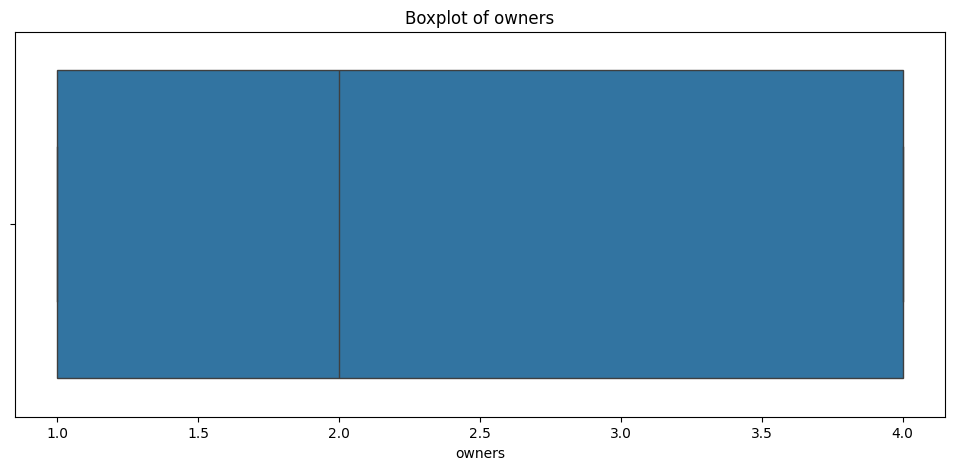

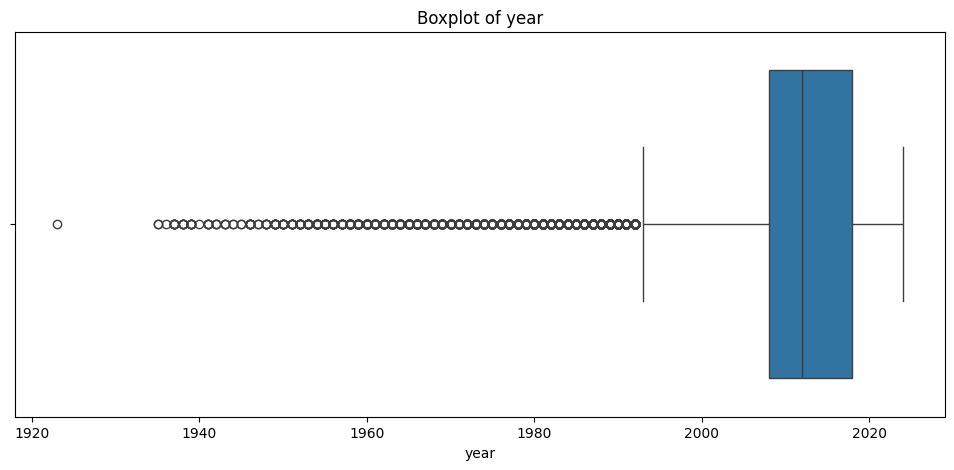

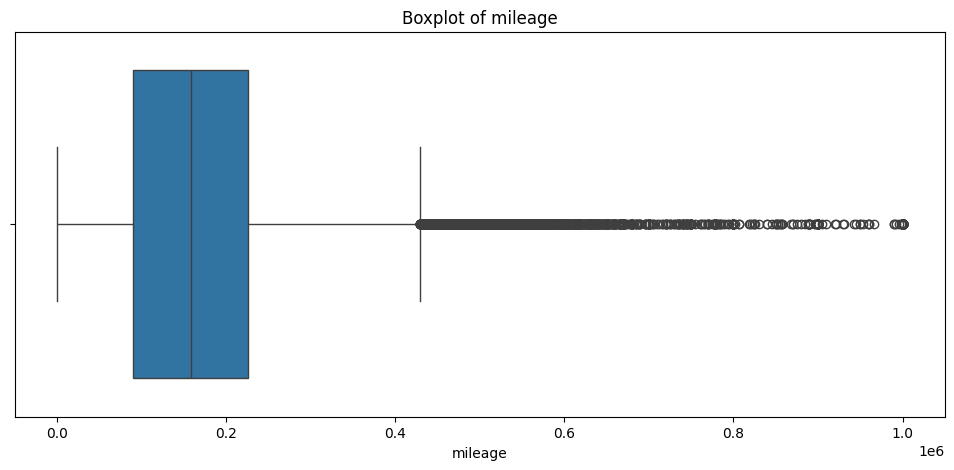

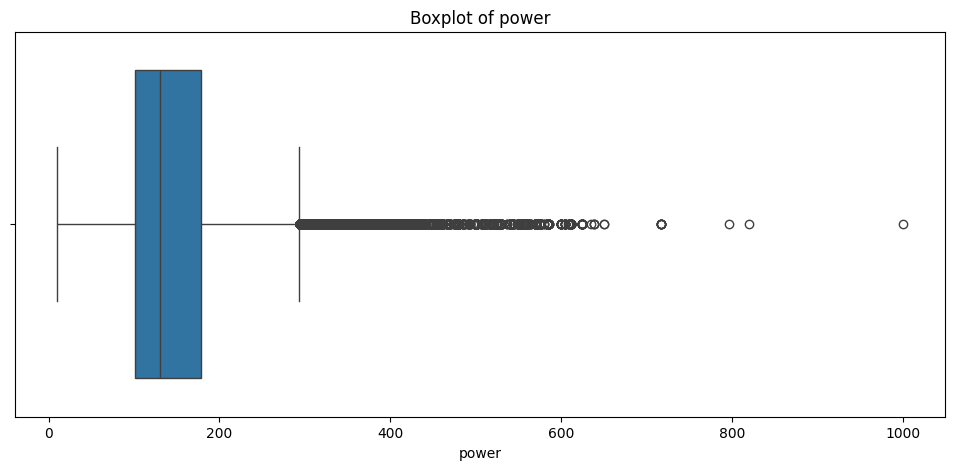

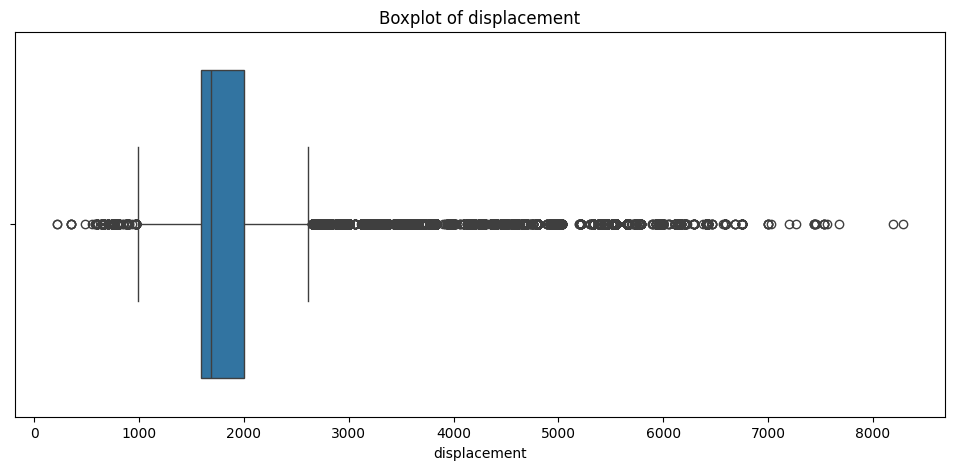

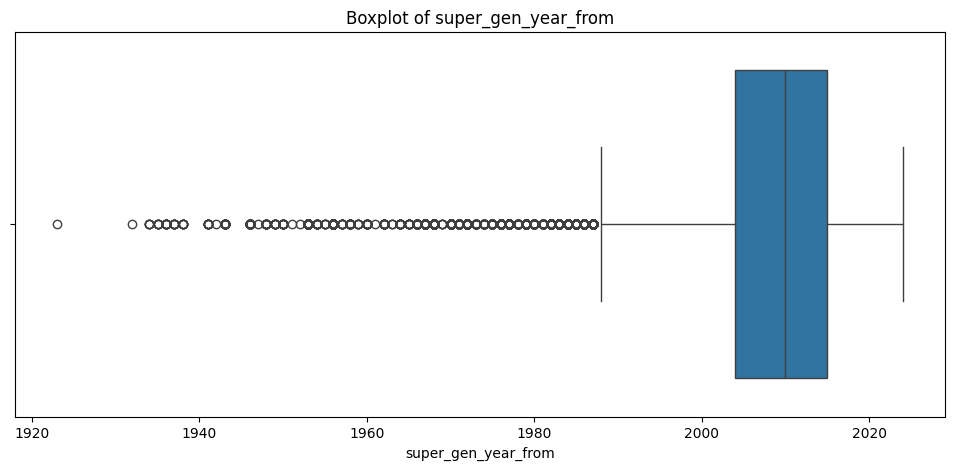

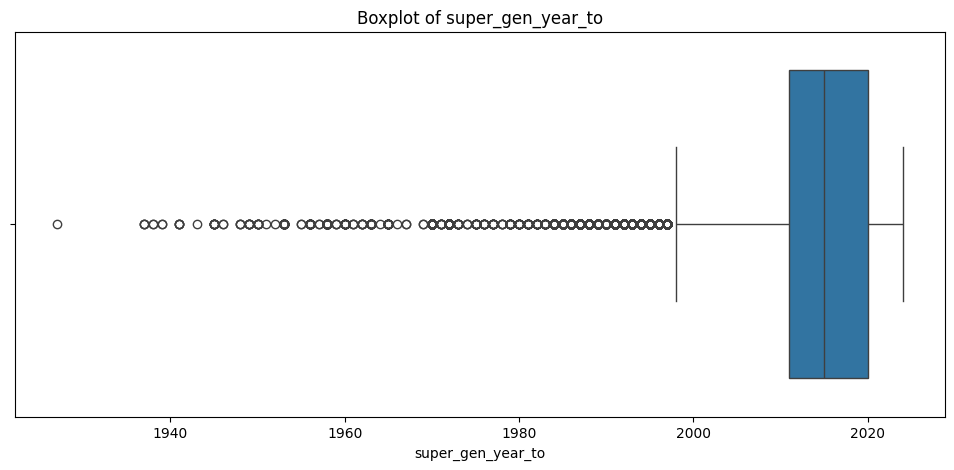

In [57]:
for col in continuous_col:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [58]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in continuous_col:
    df = remove_outliers_iqr(df, col)

print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (333801, 19)


In [59]:
from scipy.stats.mstats import winsorize
import pandas as pd

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def apply_winsorization(data, continuous_cols, lower_pct=0.01, upper_pct=0.01, apply=True):
    df_copy = data.copy()
    summary = {}

    for col in continuous_cols:
        outliers, low, high = detect_outliers_iqr(df_copy, col)
        n_out_before = len(outliers)

        if not apply:
            summary[col] = {
                "outliers_before": n_out_before,
                "outliers_after": n_out_before,
                "winsorized": False
            }
            continue

        df_copy[col] = winsorize(df_copy[col], limits=[lower_pct, upper_pct])
        outliers_after, _, _ = detect_outliers_iqr(df_copy, col)
        n_out_after = len(outliers_after)

        summary[col] = {
            "outliers_before": n_out_before,
            "outliers_after": n_out_after,
            "winsorized": True
        }

    return df_copy, summary

clean_df, outlier_report = apply_winsorization(
    df,
    continuous_col,
    lower_pct=0.01,
    upper_pct=0.01,
    apply=True
)

print("\nOutlier Report (Before vs After Winsorization):\n")
for col, stats in outlier_report.items():
    print(f"{col:25} | before={stats['outliers_before']:5} | after={stats['outliers_after']:5} | winsorized={stats['winsorized']}")


Outlier Report (Before vs After Winsorization):

owners                    | before=    0 | after=    0 | winsorized=True
year                      | before=    0 | after=    0 | winsorized=True
mileage                   | before=  833 | after=    0 | winsorized=True
power                     | before=11732 | after=11732 | winsorized=True
displacement              | before=    3 | after=    0 | winsorized=True
super_gen_year_from       | before= 1431 | after=    0 | winsorized=True
super_gen_year_to         | before=    0 | after=    0 | winsorized=True


In [60]:
df_copy = df.copy()
categorical_col = df_copy.select_dtypes(include=['object', 'category']).columns

df_copy['price_bin'] = pd.qcut(df_copy['price'], q=5, labels=False)
target = 'price_bin'

chi2_results = {}
le = LabelEncoder()

for col in categorical_col:
    if col == target:
        continue
    feature_encoded = le.fit_transform(df_copy[col])
    target_encoded = le.fit_transform(df_copy[target])
    chi2_stat, p_val = chi2(feature_encoded.reshape(-1, 1), target_encoded)
    chi2_results[col] = p_val[0]

important_cols = [col for col, p in chi2_results.items() if p < 0.05]
print(important_cols)

['region', 'mark', 'model', 'steering_wheel', 'gear_type', 'engine', 'transmission', 'characteristics', 'color', 'body_type_type', 'body_type_name']


In [61]:
import pandas as pd
from scipy.stats import f_oneway

anova_results = {}

for col in categorical_col:
    groups = [df['price'][df[col] == cat] for cat in df[col].dropna().unique()]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = p_val

important_cols = [col for col, p in anova_results.items() if p < 0.05]
print("Columns significantly correlated with price:", important_cols)

Columns significantly correlated with price: ['region', 'mark', 'model', 'steering_wheel', 'gear_type', 'engine', 'transmission', 'characteristics', 'color', 'body_type_type', 'body_type_name']


In [62]:
df_encoded = df.copy()
categorical_col = df_encoded.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for col in categorical_col:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [63]:
scaler = MinMaxScaler()
df_encoded[continuous_col] = scaler.fit_transform(df_encoded[continuous_col])

df_encoded

,owners,year,price,region,mileage,mark,model,steering_wheel,gear_type,engine,transmission,power,displacement,characteristics,color,body_type_type,body_type_name,super_gen_year_from,super_gen_year_to
0,0.000000,0.903226,1460000,44,0.131423,87,817,1,0,2,0,0.148,0.129710,3930,2,1,10,0.882353,0.958333
1,0.000000,0.580645,1460000,41,0.279275,110,1310,0,0,1,2,0.428,0.500309,1202,7,1,6,0.558824,0.583333
2,0.333333,0.838710,1460000,20,0.171554,65,954,0,1,1,0,0.312,0.372452,936,3,19,117,0.794118,0.833333
3,0.333333,0.806452,1459000,33,0.242899,123,864,0,1,1,2,0.320,0.251390,383,6,19,117,0.705882,0.833333
4,0.000000,0.935484,1457000,4,0.078949,14,1135,0,1,1,1,0.272,0.315627,716,12,1,6,0.882353,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432220,0.333333,0.612903,290000,63,0.415394,26,811,0,1,1,1,0.256,0.376776,1022,12,19,117,0.529412,0.666667
432221,1.000000,0.419355,290000,78,0.335600,66,654,0,1,1,1,0.144,0.375540,1079,8,10,201,0.411765,0.541667
432222,1.000000,0.354839,287000,48,0.679574,98,771,0,1,1,1,0.280,0.376776,1032,9,19,117,0.352941,0.250000
432224,0.333333,0.548387,290000,33,0.243204,132,315,0,1,1,1,0.100,0.192094,339,11,10,201,0.558824,0.583333


In [64]:
# ==== Cell 1 – Train/Test Split + Setup ====

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# X = all features except price, y = target price
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Dictionary to store R2 scores of each model for comparison
model_results = {}

In [65]:
# ==== Cell 2 – Linear Regression ====

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Simple hyperparameter space for RandomizedSearchCV
lin_param_dist = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lin_rand_search = RandomizedSearchCV(
    estimator=lin_reg,
    param_distributions=lin_param_dist,
    n_iter=10,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lin_rand_search.fit(X_train, y_train)

best_lin = lin_rand_search.best_estimator_
y_pred_lin = best_lin.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("=== Linear Regression ===")
print("Best params:", lin_rand_search.best_params_)
print(f"RMSE: {rmse_lin:.4f}")
print(f"MAE : {mae_lin:.4f}")
print(f"R²  : {r2_lin:.4f}")

model_results['LinearRegression'] = r2_lin

Fitting 3 folds for each of 4 candidates, totalling 12 fits
=== Linear Regression ===
Best params: {'positive': False, 'fit_intercept': True}
RMSE: 610481.8778
MAE : 396121.9465
R²  : 0.7273


In [66]:
# ==== Cell 3 – Ridge Regression ====

from sklearn.linear_model import Ridge

ridge = Ridge(random_state=42)

ridge_param_dist = {
    'alpha': np.logspace(-3, 3, 50)
}

ridge_rand_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=ridge_param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

ridge_rand_search.fit(X_train, y_train)

best_ridge = ridge_rand_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== Ridge Regression ===")
print("Best params:", ridge_rand_search.best_params_)
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE : {mae_ridge:.4f}")
print(f"R²  : {r2_ridge:.4f}")

model_results['Ridge'] = r2_ridge

Fitting 3 folds for each of 20 candidates, totalling 60 fits
=== Ridge Regression ===
Best params: {'alpha': np.float64(0.21209508879201905)}
RMSE: 610481.9795
MAE : 396121.2877
R²  : 0.7273


In [67]:
# ==== Cell 4 – Lasso Regression ====

from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42, max_iter=10000)

lasso_param_dist = {
    'alpha': np.logspace(-4, 1, 50)
}

lasso_rand_search = RandomizedSearchCV(
    estimator=lasso,
    param_distributions=lasso_param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lasso_rand_search.fit(X_train, y_train)

best_lasso = lasso_rand_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== Lasso Regression ===")
print("Best params:", lasso_rand_search.best_params_)
print(f"RMSE: {rmse_lasso:.4f}")
print(f"MAE : {mae_lasso:.4f}")
print(f"R²  : {r2_lasso:.4f}")

model_results['Lasso'] = r2_lasso

Fitting 3 folds for each of 20 candidates, totalling 60 fits
=== Lasso Regression ===
Best params: {'alpha': np.float64(4.941713361323838)}
RMSE: 610482.3137
MAE : 396117.6861
R²  : 0.7273


In [68]:
# ==== Cell 5 – Elastic Net Regression ====

from sklearn.linear_model import ElasticNet

elastic = ElasticNet(random_state=42, max_iter=10000)

elastic_param_dist = {
    'alpha': np.logspace(-4, 1, 50),
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

elastic_rand_search = RandomizedSearchCV(
    estimator=elastic,
    param_distributions=elastic_param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

elastic_rand_search.fit(X_train, y_train)

best_elastic = elastic_rand_search.best_estimator_
y_pred_elastic = best_elastic.predict(X_test)

rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("=== Elastic Net ===")
print("Best params:", elastic_rand_search.best_params_)
print(f"RMSE: {rmse_elastic:.4f}")
print(f"MAE : {mae_elastic:.4f}")
print(f"R²  : {r2_elastic:.4f}")

model_results['ElasticNet'] = r2_elastic

Fitting 3 folds for each of 30 candidates, totalling 90 fits
=== Elastic Net ===
Best params: {'l1_ratio': np.float64(0.8), 'alpha': np.float64(0.0005179474679231213)}
RMSE: 610506.3888
MAE : 396044.9064
R²  : 0.7273


In [69]:
# ==== Cell 6 – Decision Tree Regressor ====

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt_param_dist = {
    'max_depth': [None] + list(range(3, 21)),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt_rand_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param_dist,
    n_iter=40,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

dt_rand_search.fit(X_train, y_train)

best_dt = dt_rand_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("=== Decision Tree Regressor ===")
print("Best params:", dt_rand_search.best_params_)
print(f"RMSE: {rmse_dt:.4f}")
print(f"MAE : {mae_dt:.4f}")
print(f"R²  : {r2_dt:.4f}")

model_results['DecisionTree'] = r2_dt

Fitting 3 folds for each of 40 candidates, totalling 120 fits
=== Decision Tree Regressor ===
Best params: {'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
RMSE: 291939.2499
MAE : 173310.0359
R²  : 0.9376


In [70]:
# ==== Cell 8 – Simple Gradient Boosting Regressor ====

from sklearn.ensemble import GradientBoostingRegressor

# Simple, single configuration (no RandomizedSearch, no CV)
gbr = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8
)

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("=== Gradient Boosting Regressor (simple) ===")
print("Params used:")
print(gbr.get_params())
print(f"RMSE: {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"R²  : {r2_gbr:.4f}")

model_results['GradientBoosting'] = r2_gbr
best_gbr = gbr

=== Gradient Boosting Regressor (simple) ===
Params used:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
RMSE: 333263.6231
MAE : 207802.0421
R²  : 0.9187


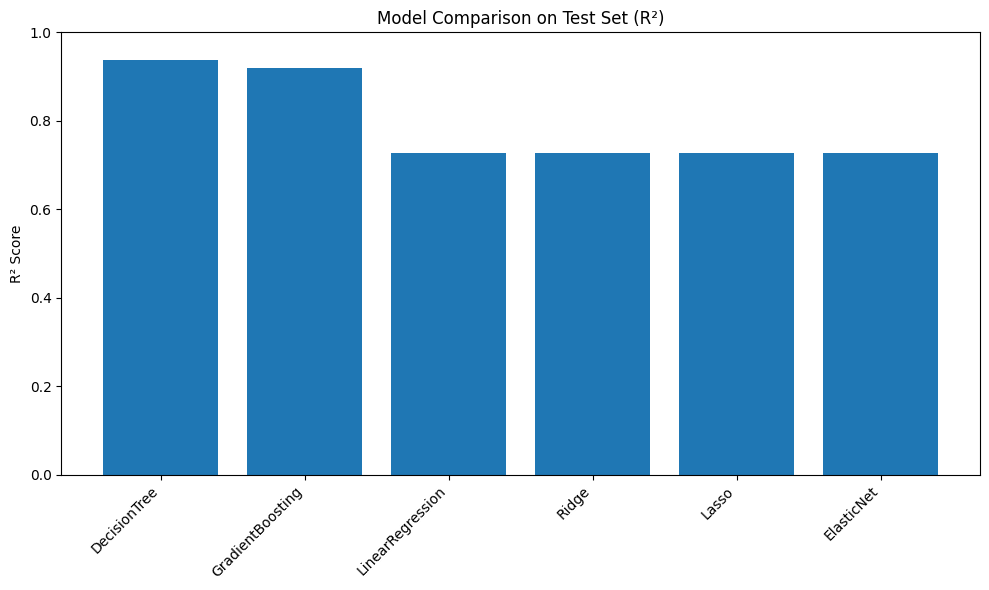

R² scores by model:
DecisionTree        : 0.9376
GradientBoosting    : 0.9187
LinearRegression    : 0.7273
Ridge               : 0.7273
Lasso               : 0.7273
ElasticNet          : 0.7273


In [71]:
# ==== Cell 12 – Plot Comparison of R² Scores ====

import matplotlib.pyplot as plt

# Sort models by R² descending
sorted_results = dict(sorted(model_results.items(), key=lambda x: x[1], reverse=True))

names = list(sorted_results.keys())
scores = list(sorted_results.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(names)), scores)
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.ylabel('R² Score')
plt.title('Model Comparison on Test Set (R²)')
plt.ylim(0, 1)  # Adjust if needed depending on your results
plt.tight_layout()
plt.show()

print("R² scores by model:")
for name, score in sorted_results.items():
    print(f"{name:20s}: {score:.4f}")

In [72]:
# ==== Cell A – Save Encoders, Scaler, and Column Order ====

import joblib
from sklearn.preprocessing import LabelEncoder

# 1) Re-fit one LabelEncoder per categorical column on the ORIGINAL df
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col].astype(str))   # same mapping used when you encoded df_encoded
    label_encoders[col] = le

# Save all label encoders in one file
joblib.dump(label_encoders, "label_encoders.pkl")
print("Saved label_encoders.pkl")

# 2) Save the MinMaxScaler you already fitted on continuous_col
joblib.dump(scaler, "minmax_scaler.pkl")
print("Saved minmax_scaler.pkl")

# 3) Save the feature column order used for training (X columns)
joblib.dump(list(X.columns), "columns.pkl")
print("Saved columns.pkl")

Saved label_encoders.pkl
Saved minmax_scaler.pkl
Saved columns.pkl


In [73]:
# ==== Cell B – Save Trained Models and Best Model ====

import joblib

# Dictionary of all trained regression models
trained_models = {
    "LinearRegression": best_lin,
    "Ridge": best_ridge,
    "Lasso": best_lasso,
    "ElasticNet": best_elastic,
    "DecisionTree": best_dt,
    "GradientBoosting": best_gbr
}

# 1) Save each model separately
for name, model in trained_models.items():
    filename = f"{name}.pkl"
    joblib.dump(model, filename)
    print(f"Saved {filename}")

# 2) Also save the best model (based on R² in model_results)
best_model_name = max(model_results, key=model_results.get)
best_model = trained_models[best_model_name]

joblib.dump(best_model, "best_model.pkl")
print(f"Best model is: {best_model_name}")
print("Saved best_model.pkl")

Saved LinearRegression.pkl
Saved Ridge.pkl
Saved Lasso.pkl
Saved ElasticNet.pkl
Saved DecisionTree.pkl
Saved GradientBoosting.pkl
Best model is: DecisionTree
Saved best_model.pkl


In [76]:
# ==== Cell C – Download Artifacts from Colab (Optional) ====

from google.colab import files

files.download("best_model.pkl")
files.download("label_encoders.pkl")
files.download("minmax_scaler.pkl")
files.download("columns.pkl")

# If you want specific models too:
# files.download("LinearRegression.pkl")
files.download("GradientBoosting.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>